# Step 4: Model Selection and Training

In [ ]:
# !pip install --pre pycaret

In [ ]:
# !pip install pyarrow

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('D:\Adenosine Triphosphate\KAM KA BUTTER\Data Science\Capstone Projects\Singapore  Resale Flat Prices Predicting\data.csv')
df.to_parquet('Data.parquet')
df = pd.read_parquet('Data.parquet')
del df['Unnamed: 0']
df['town'] = df.town.astype('category')
df['flat_type'] = df.flat_type.astype('category')
df['storey_range'] = df.storey_range.astype('category')
df['age_of_flat'] = df.age_of_flat.astype('int8')
df['resale_price'] = df.resale_price.astype('float32')
df['lease_commence_date'] = df.lease_commence_date.astype('int16')
df.head()

,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,town,age_of_flat,price_per_square_meter
0,2 ROOM,10 TO 12,44.0,Improved,1979,232000.0,ANG MO KIO,44,5272.727273
1,3 ROOM,01 TO 03,67.0,New Generation,1978,250000.0,ANG MO KIO,45,3731.343284
2,3 ROOM,01 TO 03,67.0,New Generation,1980,262000.0,ANG MO KIO,43,3910.447761
3,3 ROOM,04 TO 06,68.0,New Generation,1980,265000.0,ANG MO KIO,43,3897.058824
4,3 ROOM,01 TO 03,67.0,New Generation,1980,265000.0,ANG MO KIO,43,3955.223881


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164355 entries, 0 to 164354
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   flat_type               164355 non-null  category
 1   storey_range            164355 non-null  category
 2   floor_area_sqm          164355 non-null  float64 
 3   flat_model              164355 non-null  object  
 4   lease_commence_date     164355 non-null  int16   
 5   resale_price            164355 non-null  float32 
 6   town                    164355 non-null  category
 7   age_of_flat             164355 non-null  int8    
 8   price_per_square_meter  164355 non-null  float64 
dtypes: category(3), float32(1), float64(2), int16(1), int8(1), object(1)
memory usage: 5.3+ MB


In [37]:
from pycaret.regression import *
reg = setup(df, target = 'resale_price',
            ignore_features = ['price_per_square_meter'],
            session_id = 123,
            normalize = True, #normalisation helps some algorithms
            normalize_method = 'robust', #resilient to outliers
            transform_target = True, #applies transformation to target column
            data_split_shuffle = True, 
#             create_clusters = True,
#             feature_interaction = True,
            use_gpu = False,
#             silent = True,
            n_jobs = -1)

,Description,Value
0,Session id,123
1,Target,resale_price
2,Target type,Regression
3,Original data shape,"(164355, 9)"
4,Transformed data shape,"(164355, 49)"
5,Transformed train set shape,"(115048, 49)"
6,Transformed test set shape,"(49307, 49)"
7,Ignore features,1
8,Numeric features,3
9,Categorical features,4


In [38]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,47227.5691,3629160780.8000,60240.1984,0.8712,0.1233,0.1001,0.7670
catboost,CatBoost Regressor,47339.8176,3633485839.9274,60276.6650,0.8711,0.1234,0.1004,5.8880
rf,Random Forest Regressor,47490.2368,3793876128.2737,61591.8758,0.8654,0.1272,0.1010,10.2210
lightgbm,Light Gradient Boosting Machine,49500.0738,3984238807.7845,63119.0247,0.8586,0.1277,0.1045,0.6300
et,Extra Trees Regressor,48641.1652,4056651547.8521,63688.8444,0.8561,0.1306,0.1032,11.2360
dt,Decision Tree Regressor,49291.5955,4219923509.4403,64957.8219,0.8503,0.1326,0.1045,0.7920
knn,K Neighbors Regressor,52210.6707,4808349132.8000,69340.0383,0.8294,0.1393,0.1096,2.0360
gbr,Gradient Boosting Regressor,59250.5516,6126006786.5051,78267.0970,0.7826,0.1498,0.1219,3.8110
br,Bayesian Ridge,72507.8494,9152239731.8723,95661.9210,0.6753,0.1809,0.1476,0.6150
ridge,Ridge Regression,72507.7765,9152264114.2501,95662.0471,0.6753,0.1809,0.1476,0.3600


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [42]:
print(best)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...)


In [43]:
xgboost = create_model('xgboost')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:41:51
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,47186.0625,3628267008.0000,60235.0977,0.8707,0.1230,0.0996
1,47092.6523,3598106880.0000,59984.2227,0.8727,0.1229,0.0999
2,46881.5039,3581638912.0000,59846.7969,0.8714,0.1220,0.0990
3,47034.0430,3586459904.0000,59887.0586,0.8689,0.1235,0.1002
4,47687.3086,3706596352.0000,60881.8242,0.8700,0.1245,0.1009
5,47600.7695,3743666944.0000,61185.5117,0.8667,0.1244,0.1008
6,47287.2148,3644758784.0000,60371.8359,0.8708,0.1237,0.1002
7,47651.4688,3686479360.0000,60716.3828,0.8721,0.1239,0.1009
8,46798.4492,3520726016.0000,59335.7070,0.8764,0.1218,0.0995


In [44]:
evaluate_model(xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

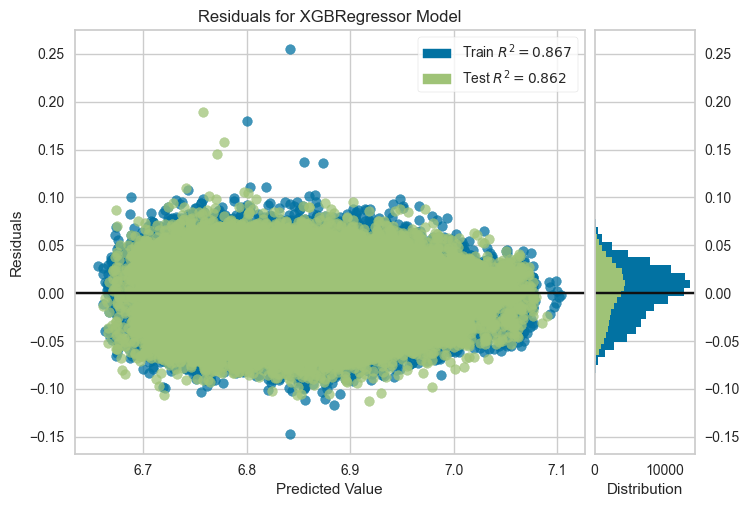

In [45]:
plot_model(xgboost, plot = 'residuals')

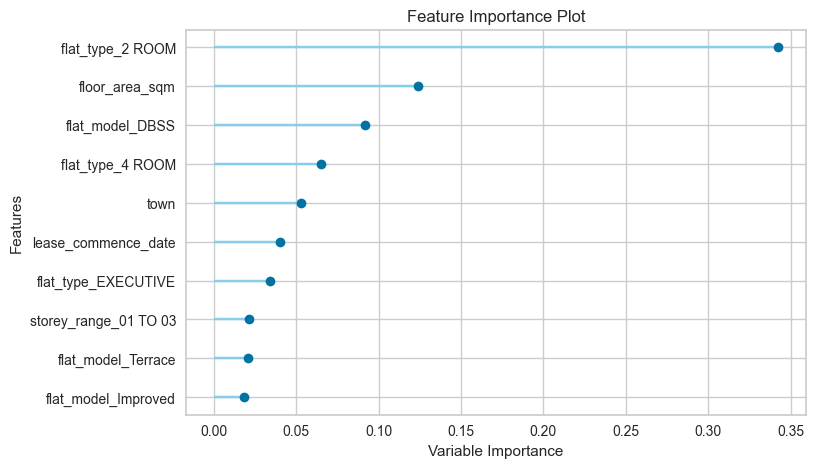

In [46]:
plot_model(xgboost, plot = 'feature')

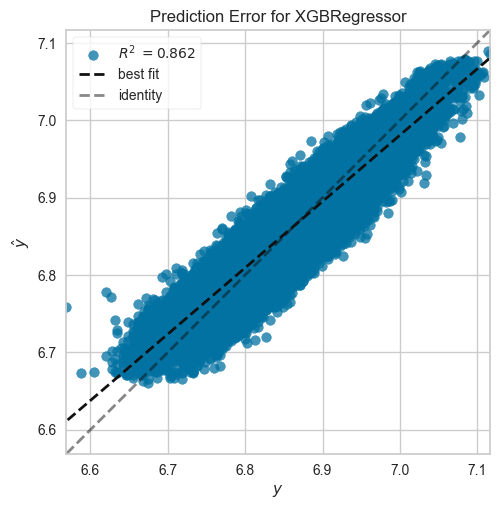

In [47]:
plot_model(xgboost, plot = 'error')

In [48]:
predict_model(xgboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,46993.7812,3583113728.0000,59859.1172,0.8724,0.1232,0.1001


,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,town,age_of_flat,resale_price,prediction_label
160944,5 ROOM,04 TO 06,132.0,Adjoined flat,1970,TOA PAYOH,53,690000.0,537056.87500
24757,4 ROOM,07 TO 09,107.0,Model A,1987,BUKIT PANJANG,36,350000.0,417222.00000
5496,4 ROOM,10 TO 12,101.0,Model A,1997,SERANGOON,26,390000.0,468987.09375
138838,3 ROOM,04 TO 06,103.0,New Generation,1982,KALLANG/WHAMPOA,41,576000.0,559089.68750
46541,4 ROOM,13 TO 15,93.0,Premium Apartment,2012,BUKIT PANJANG,11,420000.0,455058.12500
...,...,...,...,...,...,...,...,...,...
134921,3 ROOM,01 TO 03,68.0,Model A,2018,QUEENSTOWN,5,610000.0,602721.68750
96510,4 ROOM,04 TO 06,85.0,Model A,2009,BUKIT MERAH,14,713000.0,692652.68750
145450,4 ROOM,10 TO 12,93.0,Model A,2019,BUKIT BATOK,4,620000.0,646164.31250
47083,5 ROOM,10 TO 12,120.0,Standard,1975,MARINE PARADE,48,828000.0,792745.31250


In [49]:
predictions = predict_model(xgboost, data=df)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,46324.4844,3474516480.0000,58945.0312,0.8766,0.1214,0.0985


,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,town,age_of_flat,price_per_square_meter,resale_price,prediction_label
0,2 ROOM,10 TO 12,44.0,Improved,1979,ANG MO KIO,44,5272.727051,232000.0,242790.40625
1,3 ROOM,01 TO 03,67.0,New Generation,1978,ANG MO KIO,45,3731.343262,250000.0,283169.43750
2,3 ROOM,01 TO 03,67.0,New Generation,1980,ANG MO KIO,43,3910.447754,262000.0,283868.71875
3,3 ROOM,04 TO 06,68.0,New Generation,1980,ANG MO KIO,43,3897.058838,265000.0,298051.56250
4,3 ROOM,01 TO 03,67.0,New Generation,1980,ANG MO KIO,43,3955.223877,265000.0,283868.71875


In [50]:
save_model(xgboost, 'XGBOOST_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['floor_area_sqm',
                                              'lease_commence_date',
                                              'age_of_flat'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrap...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, ma

In [51]:
loaded_model = load_model('XGBOOST_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\tinku\AppData\Local\Temp\joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['floor_area_sqm',
                                             'lease_commence_date',
                                             'age_of_flat'],
                                    transformer=SimpleImputer())...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None,

In [52]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,47287.7616,3644190129.8910,60367.1279,0.8702,0.1231,0.0998
1,47134.2027,3564935116.8745,59707.0776,0.8739,0.1227,0.1000
2,46933.9482,3596472132.0666,59970.5939,0.8709,0.1222,0.0993
3,47291.8360,3620794539.2913,60173.0383,0.8676,0.1239,0.1006
4,47700.8887,3684688345.5396,60701.6338,0.8708,0.1244,0.1010
5,47688.6455,3722961715.8012,61016.0775,0.8675,0.1244,0.1011
6,47325.4574,3648904273.7367,60406.1609,0.8706,0.1236,0.1003
7,47745.3360,3692164086.8538,60763.1804,0.8719,0.1240,0.1011
8,46885.6559,3535124170.8776,59456.9102,0.8759,0.1220,0.0997


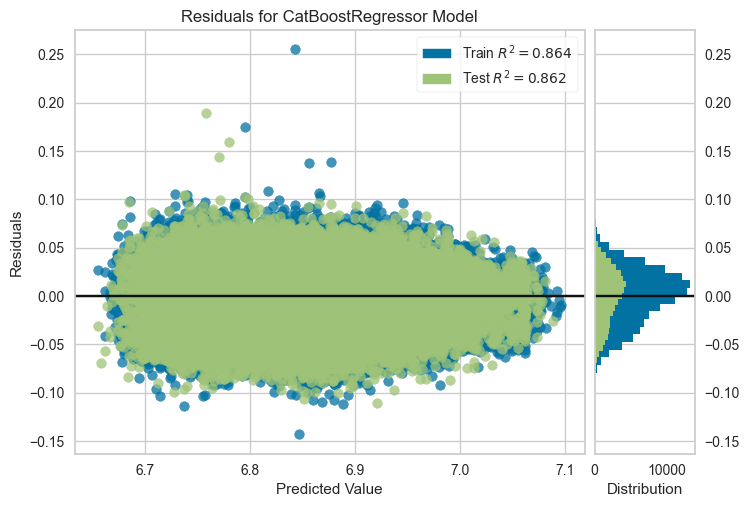

In [53]:
plot_model(catboost, plot = 'residuals')

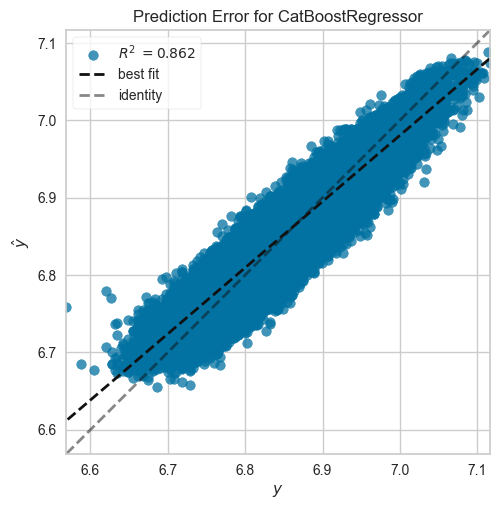

In [54]:
plot_model(catboost, plot = 'error')

In [61]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,47524.1017,3777094105.0031,61458.0679,0.8654,0.1269,0.1009
1,47099.0887,3741406142.2974,61167.0348,0.8676,0.1263,0.1002
2,47286.6592,3790493696.4907,61566.9854,0.8639,0.1263,0.1002
3,47369.1492,3761828429.3065,61333.7463,0.8625,0.1276,0.1012
4,47670.0196,3843293753.5635,61994.3042,0.8652,0.1279,0.1012
5,47584.5830,3851977872.2275,62064.3043,0.8629,0.1276,0.1011
6,47666.6219,3807196787.3425,61702.4861,0.8650,0.1279,0.1015
7,48352.7994,3940827384.6604,62776.0096,0.8632,0.1289,0.1026
8,46935.5654,3671657234.8556,60594.2013,0.8711,0.1258,0.1003


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [56]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,49396.8226,3994400604.3327,63201.2706,0.8577,0.1274,0.1039
1,49448.2043,3947764517.8109,62831.2384,0.8603,0.1273,0.1044
2,49255.6695,3962997230.5121,62952.3409,0.8577,0.1268,0.1036
3,49472.6273,3972044615.8822,63024.1590,0.8548,0.1280,0.1047
4,49806.2237,4022048758.2463,63419.6244,0.8589,0.1285,0.1050
5,49829.2943,4087535881.6089,63933.8399,0.8545,0.1286,0.1052
6,49510.7882,4006656026.6470,63298.1518,0.8580,0.1281,0.1045
7,49776.4347,4021966322.1081,63418.9745,0.8604,0.1280,0.1050
8,48845.5147,3842875379.2682,61990.9298,0.8651,0.1259,0.1035


In [57]:
blend = blend_models(estimator_list=[xgboost,catboost,lightgbm,rf])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,46638.3335,3536999475.1858,59472.6784,0.8740,0.1218,0.0987
1,46457.3076,3479821218.0562,58990.0095,0.8769,0.1215,0.0988
2,46293.9731,3499277420.7787,59154.6906,0.8744,0.1209,0.0980
3,46572.0411,3508829107.1376,59235.3704,0.8717,0.1225,0.0994
4,46989.1830,3583790987.0763,59864.7725,0.8743,0.1230,0.0997
5,46945.8643,3620272709.6944,60168.7021,0.8711,0.1229,0.0997
6,46757.1543,3558505121.1011,59653.2071,0.8738,0.1226,0.0993
7,47138.1677,3608384804.5975,60069.8327,0.8748,0.1230,0.1000
8,46172.2823,3419704087.7482,58478.2360,0.8799,0.1207,0.0985


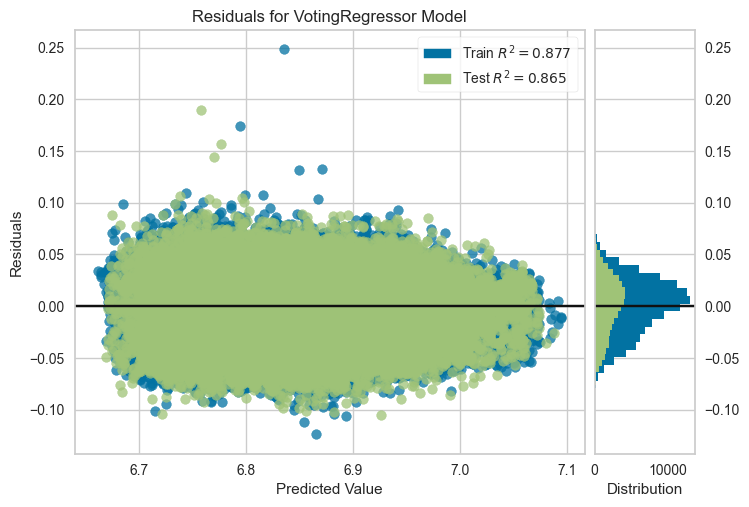

In [58]:
plot_model(blend, plot = 'residuals')

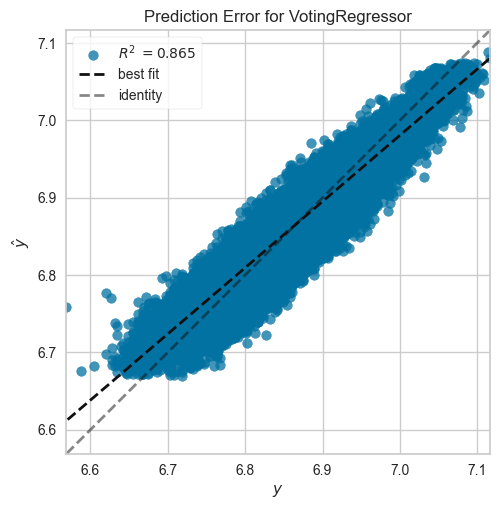

In [59]:
plot_model(blend, plot = 'error')

In [60]:
predictions = predict_model(blend, data=df)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,44778.4667,3235659594.7483,56882.8585,0.8851,0.1177,0.0955


,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,town,age_of_flat,price_per_square_meter,resale_price,prediction_label
0,2 ROOM,10 TO 12,44.0,Improved,1979,ANG MO KIO,44,5272.727051,232000.0,233057.194923
1,3 ROOM,01 TO 03,67.0,New Generation,1978,ANG MO KIO,45,3731.343262,250000.0,283273.367021
2,3 ROOM,01 TO 03,67.0,New Generation,1980,ANG MO KIO,43,3910.447754,262000.0,285821.013405
3,3 ROOM,04 TO 06,68.0,New Generation,1980,ANG MO KIO,43,3897.058838,265000.0,298804.328613
4,3 ROOM,01 TO 03,67.0,New Generation,1980,ANG MO KIO,43,3955.223877,265000.0,285821.013405


In [62]:
save_model(blend, 'Blend_pipline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['floor_area_sqm',
                                              'lease_commence_date',
                                              'age_of_flat'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrap...
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=-1,
                                                            num_parallel_tree=None,
       